In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [6]:
#load Agriculture data using Han's code as 'agr'
file1 = pd.read_csv('./agriculture_data/merged.csv')
file2 = pd.read_csv('./health_data/merged.csv')
agr = file1.drop(['Unnamed: 0'], axis=1)
health = file2.drop(['Unnamed: 0'], axis=1)
oda = pd.read_csv('./merged_aid_receiced.csv').drop(['Unnamed: 0',], axis=1)

## save downloaded origin file 
#agr.to_csv('./agriculture_origin.csv', index=False)
#health.to_csv('./health_origin.csv', index=False)
#oda.to_csv('./oda_origin.csv', index=False)
agr

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,120000.0,130000.000000,140000.000000,150000.000000,155000.000000,160000.000000,165000.000000,170000.000000,175000.000000,168350.000000,171000.000000,174660.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,173000.000000,171400.000000,166700.000000,213000.000000,203700.000000,201800.000000,203700.000000,204000.000000,225000.000000,245000.000000,267782.0,266100.000000,264500.000000,262850.000000,261200.000000,259500.000000,257800.000000,256100.000000,254400.000000,252700.000000,251000.000000,249300.000000,247600.000000,245900.000000,244320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belize,BLZ,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,211.0,269.000000,314.000000,402.000000,400.000000,450.000000,500.000000,525.000000,550.000000,573.000000,596.000000,619.000000,642.000000,665.000000,688.000000,710.000000,734.000000,757.000000,780.000000,803.000000,825.000000,845.000000,870.000000,893.000000,940.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bolivia,BOL,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,1300.0,1400.000000,1500.000000,1600.000000,1700.000000,1800.000000,1900.000000,2000.000000,2100.000000,2200.000000,2300.000000,2400.000000,2600.000000,2800.000000,3000.000000,3200.000000,3400.000000,3600.000000,3800.000000,4000.000000,4200.000000,4400.000000,4500.000000,4600.000000,4750.000000,4900.000000,5000.000000,5100.0,5100.000000,5200.000000,5300.000000,5350.000000,5350.000000,5350.000000,5500.000000,5600.000000,5700.000000,5700.000000,5700.000000,6000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,72000.0,82000.000000,93000.000000,103000.000000,114000.000000,124000.000000,134500.000000,145000.000000,155400.000000,165870.000000,183500.000000,201000.000000,218500.000000,236000.000000,323113.000000,350000.000000,370000.000000,428000.000000,485000.000000,545205.000000,569000.000000,593000.000000,617000.000000,641000.000000,666309.000000,678803.000000,691297.000000,703790.0,716285.000000,728779.000000,741272.000000,753766.000000,766260.000000,778754.000000,791248.000000,803742.000000,802173.000000,800604.000000,799035.000000,797466.000000,795898.000000,794329.000000,792760.000000,791191.000000,789622.000000,788053.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chile,CHL,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,33550.0,33600.000000,33650.000000,33700.000000,33750.000000,33800.000000,33850.000000,33900.000000,33950.000000,34000.000000,34050.000000,34100.000000,34150.000000,34200.000000,34300.000000,34407.000000,34400.000000,34395.000000,34385.000000,34380.000000,34370.000000,34365.000000,34360.000000,34350.000000,34340.000000,37920.000000,41270.000000,37450.0,36620.000000,35750.000000,37570.000000,39900.000000,41710.000000,41312.000000,43201.000000,44265.000000,53710.000000,53730.000000,53750.000000,53770.000000,53790.000000,53810.000000,53830.000000,53850.000000,53870.000000,53890.000000,53915.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Peru,PER,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,NaN,NaN,19.

In [10]:
def make_org_series(df):
    origin_series_code=list(df['Series_Code'].unique())
    origin_series_name=list(df['Series_Name'].unique())
    origin_series = pd.DataFrame({'Series Code': origin_series_code,'Series Name': origin_series_name})
    return origin_series
#make_org_series(agr).to_csv('./agriculture_series.csv', index=False)
#make_org_series(health).to_csv('./health_series.csv', index=False)
#make_org_series(oda).to_csv('./oda_series.csv', index=False)

In [11]:
## rename columns in '*_series.csv' manually in Excel
agr_ser = pd.read_csv('./agriculture_series_new.csv')
health_ser = pd.read_csv('./health_series_new.csv')
oda_ser = pd.read_csv('./oda_series_new.csv')

In [15]:
## apply new name to Series in dataframe
def rename_ser(df_org, ser): 
    for code, newName in zip(ser['Series Code'], ser['New Series Name']):
        df_org.loc[df_org.Series_Code == code, 'Series_Name'] = newName
    return df_org

agr_df = rename_ser(agr, agr_ser)
health_df = rename_ser(health, health_ser)
oda_df = rename_ser(oda, oda_ser)
#agr_df.to_csv('./agriculture_cleaned.csv', index=False)
#health_df.to_csv('./health_cleaned.csv', index=False)
#oda_df.to_csv('./oda_cleaned.csv', index=False)

## Explore Korea Data

In [44]:
## concatenate all the dataframes
total_df = pd.concat([agr_df, health_df, oda_df], ignore_index=True)
korea_data = total_df.loc[total_df['Country_Code']=="KOR"]
# Drop non essential columns
korea_data.drop(['Series_Code', 'Country_Code', 'Country_Name'], axis=1, inplace=True)
# Reset index to allow for easy Transpose
korea_data.set_index('Series_Name', inplace=True)
tkorea_data = korea_data.T

In [45]:
tkorea_data

Series_Name,Tractors_num,FertilizerCons_pctFertilizerProd,FertilizerCons_kgHec,AgriLand_sqkm,AgrilLand_pctLand,ArableLand_hec,ArableLand_hecPerson,ArableLand_pctLand,LandCerealProd_pctLand,PermanentCropLand_pctLand,RuralLandBel5_sqkm,RuralLandBel5_pctLand,Forest_sqkm,Forest_pctLand,IrrigatedLand_pctAgriLand,PercipiAvg_mmYear,Land_sqkm,RuralLand_sqkm,TractorsPer100sqkm_num,CerealProd_mton,CropProd_20146,FoodProd_20146,LivestockProd_20146,SurfaceArea_sqkm,CerealYield_kgHec,RuralElectricity_pctRuralPop,AgriCH4Emit_mton,AgriCH4Emit_pctTotEmit,AgriN2OEmit_mton,AgriN2OEmit_pctTotEmit,RuralPopBel5_pctTotPop,FreshwaterAgri_pctTotFreshwater,AFF_USD,AFF_pctGDP,FemaleEmpAgri_pctFemaleEmp,MaleEmpAgri_pctMaleEmp,EmpAgri_pctEmp,RuralPop_num,RuralPopGrowth_pctAnnual,RuralPop_pctTotPop,AgriMaterialImport_pctImports,AgriMaterialExport_pctExports,DeathInfant,DeathBel5,LifeExpectancy_year,TotalBilateralAidFlows,ODAReceived_PerCapita_USD,ODA&AIDReceived_USD
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.447133e+09,36.560474,NaN,NaN,NaN,18081445.0,NaN,72.290,NaN,NaN,83304.0,115768.0,55.415537,2.504600e+08,10.023439,2.507100e+08
1961,24.0,868.135007,155.491392,21130.0,21.905453,2033000.0,0.078903,21.076094,2073629.0,0.642753,NaN,NaN,NaN,NaN,NaN,NaN,96460.0,NaN,0.118052,6629757.0,43.78,24.38,4.66,99260.0,3197.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.351621e+08,38.682091,NaN,NaN,NaN,18414469.0,1.825044,71.469,NaN,NaN,79823.0,111024.0,56.014976,2.295200e+08,8.893616,2.291500e+08
1962,24.0,828.947368,157.657658,20810.0,21.573709,1998000.0,0.075359,20.713249,2112667.0,0.673854,NaN,NaN,NaN,NaN,NaN,1274.0,96460.0,NaN,0.120120,5902917.0,41.62,23.02,4.31,99260.0,2794.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.031004e+09,36.634232,NaN,NaN,NaN,18702026.0,1.549515,70.539,22.169094,13.353641,76207.0,105998.0,56.512317,2.357300e+08,8.909205,2.362100e+08
1963,24.0,909.586303,172.065672,21000.0,21.770682,2010000.0,0.073730,20.837653,2178119.0,0.725689,NaN,NaN,NaN,NaN,NaN,NaN,96460.0,NaN,0.119403,6377585.0,45.25,25.58,5.57,99260.0,2928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.719314e+09,43.103714,NaN,NaN,NaN,18972268.0,1.434647,69.593,17.491083,16.390062,72382.0,100552.0,56.970610,2.490100e+08,9.617873,2.622000e+08
1964,30.0,555.628813,172.497370,21910.0,22.714078,2091000.0,0.074721,21.677379,2271775.0,0.829359,NaN,NaN,NaN,NaN,NaN,NaN,96460.0,NaN,0.143472,7380506.0,54.36,30.55,6.65,99260.0,3248.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.609336e+09,46.526876,NaN,NaN,NaN,19204966.0,1.219056,68.628,21.668106,11.349566,68381.0,94658.0,57.440927,1.685900e+08,6.135258,1.716900e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,192.033539,353.562639,17008.0,17.446071,1421000.0,0.027744,14.576003,858441.0,2.287438,NaN,NaN,63250.0,64.879115,NaN,NaN,97489.0,NaN,NaN,5831148.0,96.83,98.33,99.93,100339.0,6792.7,100.0,9210.0,NaN,4760.0,NaN,NaN,NaN,2.788760e+10,1.859035,4.99,4.91,4.94,9443539.0,0.788121,18.438,1.582048,0.856373,1195.0,1412.0,82.275610,NaN,NaN,NaN
2017,NaN,161.165096,355.997415,16767.0,17.195159,1396700.0,0.027193,14.323659,821774.0,2.297200,NaN,NaN,63170.0,64.783099,NaN,1274.0,97510.0,NaN,NaN,5486957.0,96.00,97.50,99.08,100360.0,6677.0,100.0,9200.0,NaN,4780.0,NaN,NaN,58.932132,3.005446e+10,1.850756,4.77,5.04,4.92,9500413.0,0.600447,18.497,1.410101,0.928673,1125.0,1331.0,82.626829,NaN,NaN,NaN
2018,NaN,167.903747,369.735844,16520.0,16.940115,1374000.0,0.026624,14.089418,824441.0,2.276456,NaN,NaN,63070.0,64.673913,NaN,NaN,97520.0,NaN,NaN,5428929.0,96.89,100.71,104.70,100370.0,6585.0,100.0,9290.0,NaN,4880.0,NaN,NaN,NaN,3.012276e+10,1.746403,4.74,5.18,5.00,9568386.0,0.712927,18.541,1.366635,0.948203,1059.0,1254.0,82.626829,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62970.0,64.571370,NaN,NaN,97520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,

In [48]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()# Drop non essential columns
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

C:\ProgramData\anaconda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


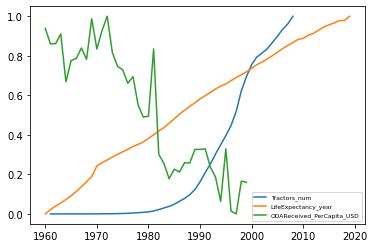

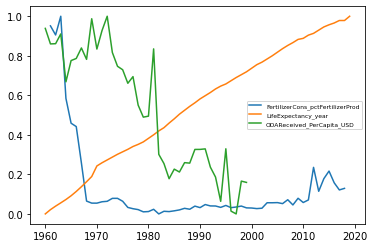

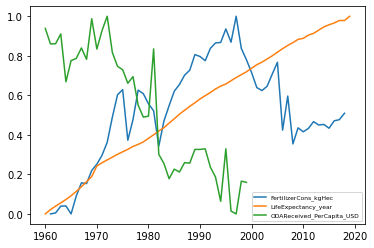

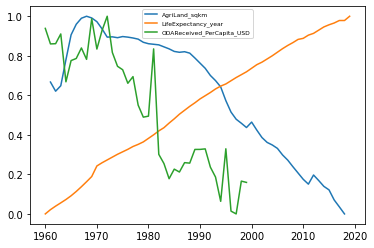

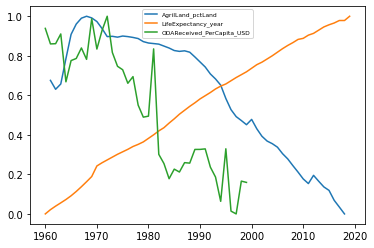

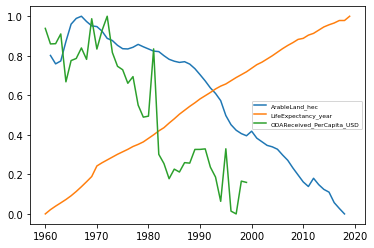

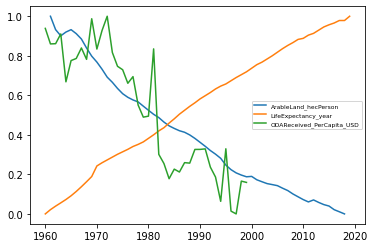

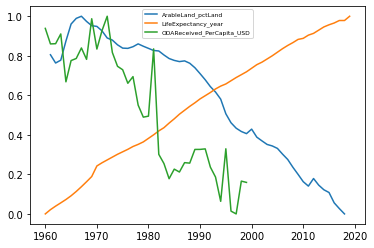

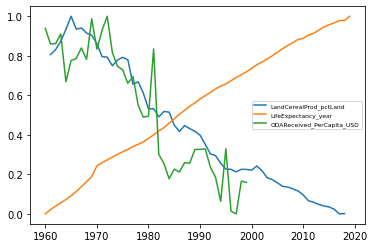

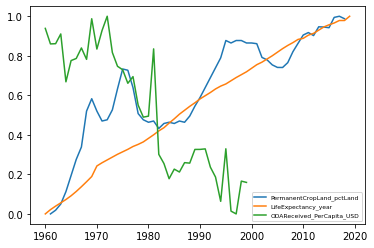

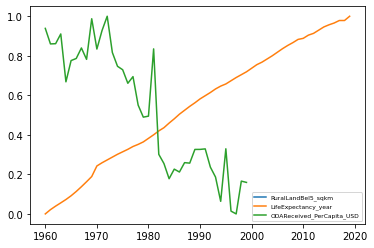

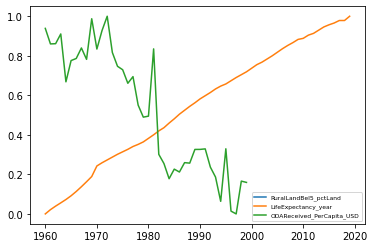

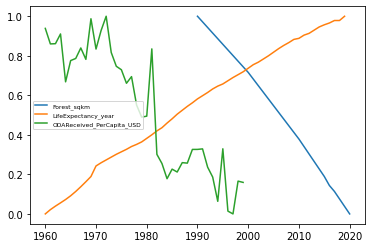

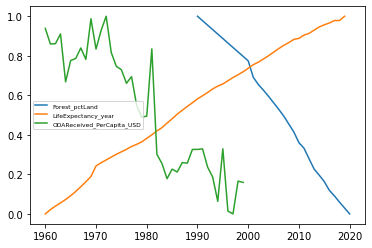

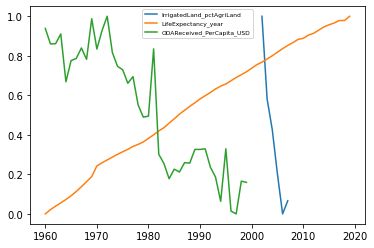

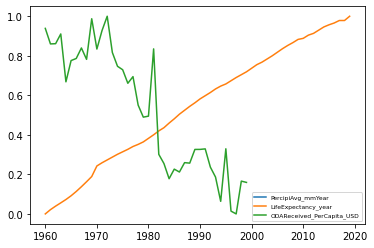

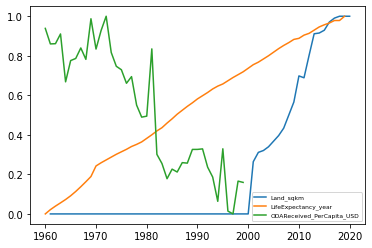

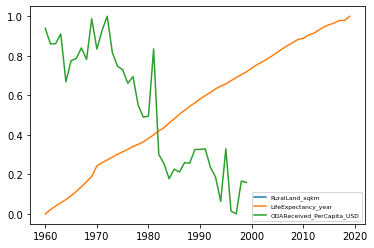

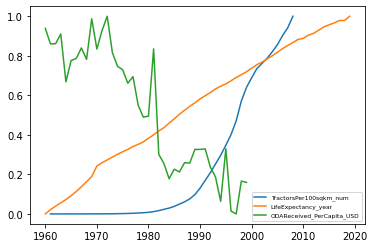

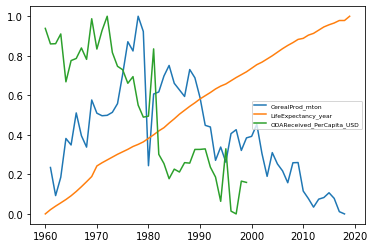

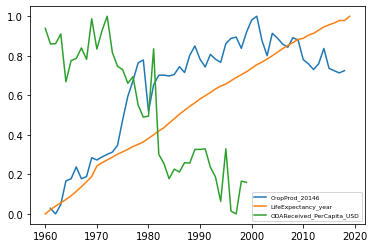

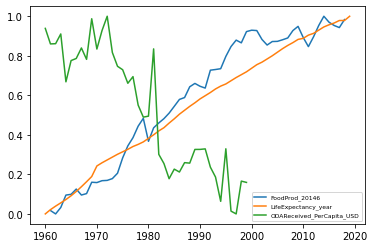

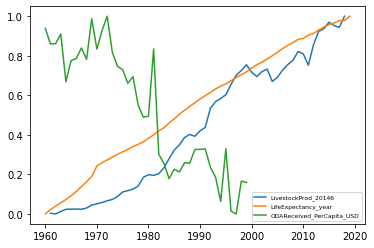

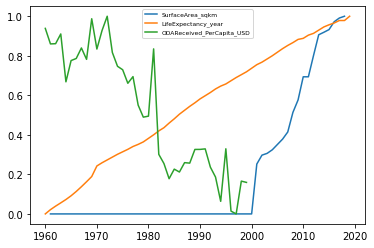

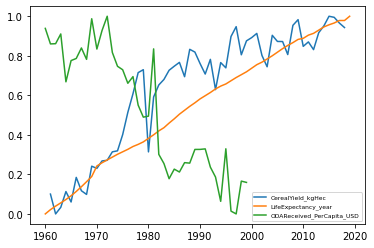

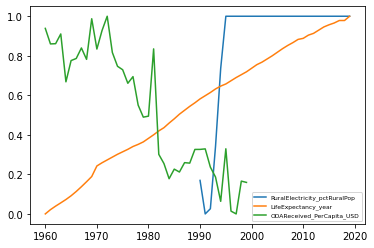

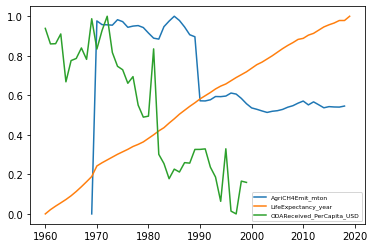

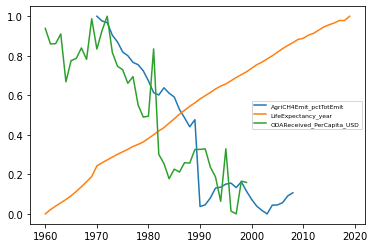

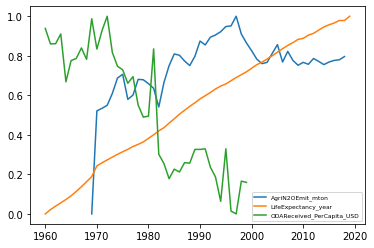

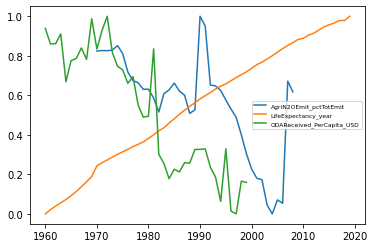

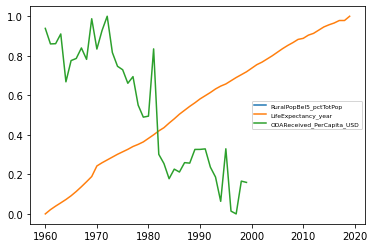

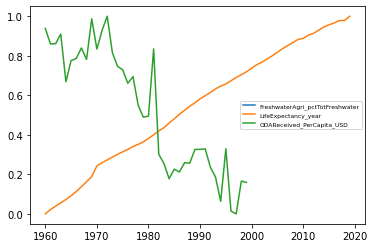

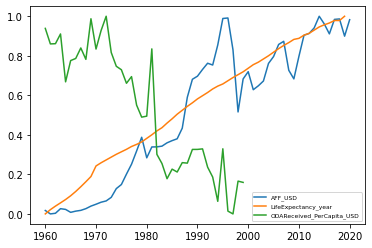

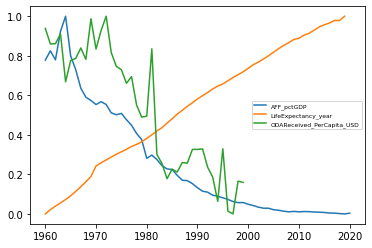

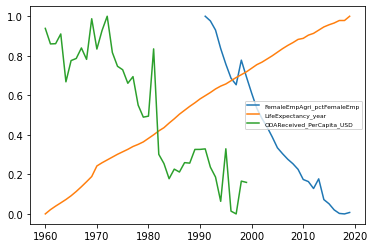

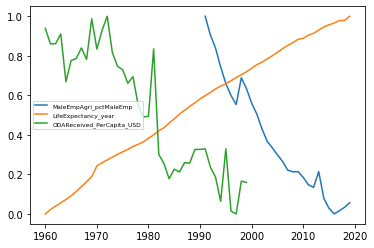

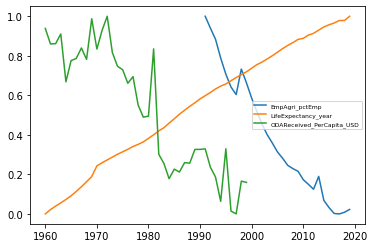

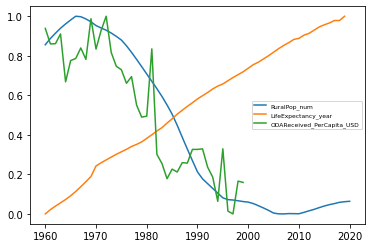

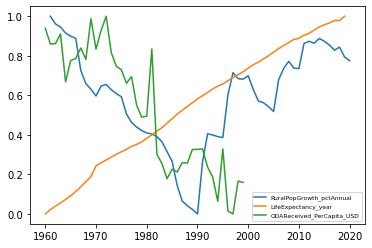

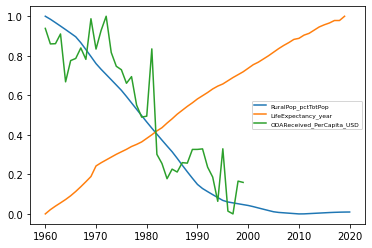

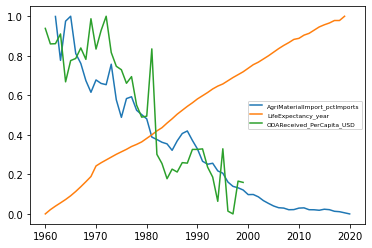

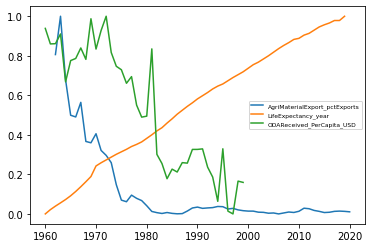

In [55]:
for i in range(0,42):
    tmp=tkorea_data.iloc[:,[i,44,46]]
    tmp = normalize(tmp)
    tmp.plot()
    plt.legend(fontsize=6)

<ipython-input-56-47c3670dc775>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


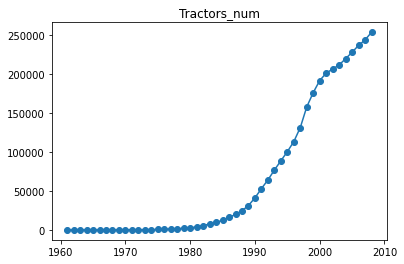

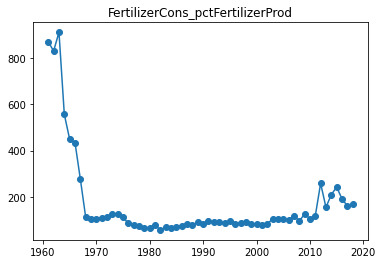

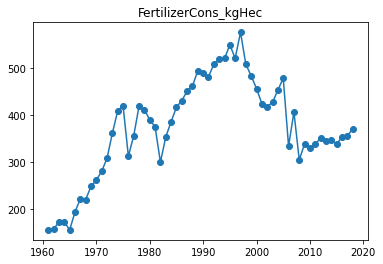

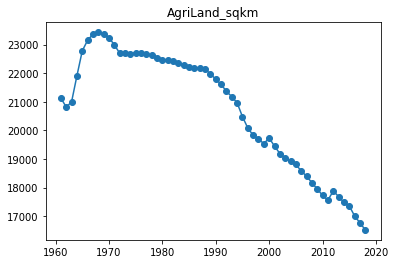

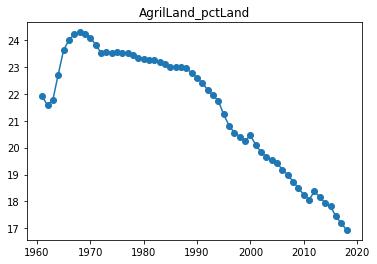

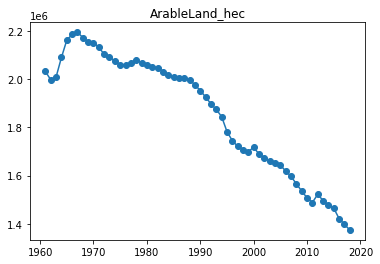

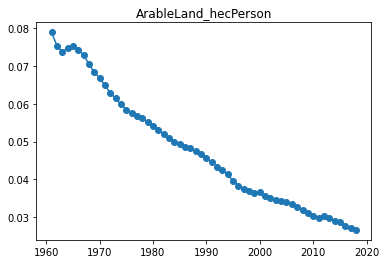

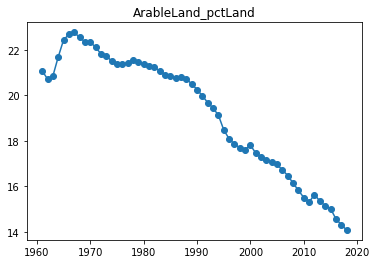

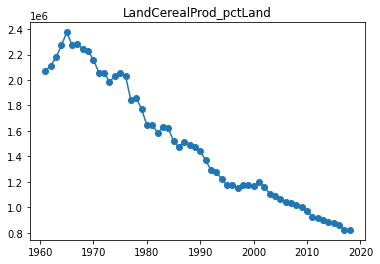

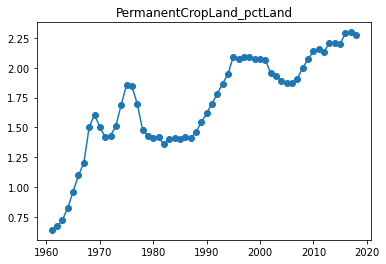

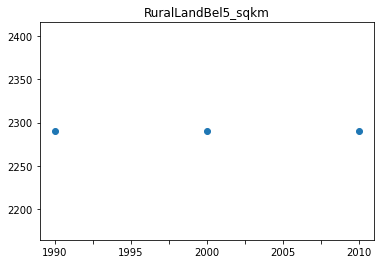

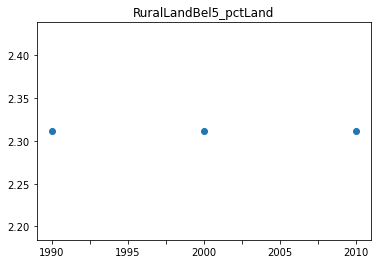

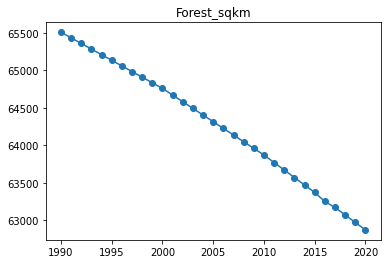

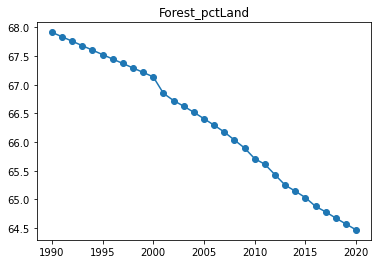

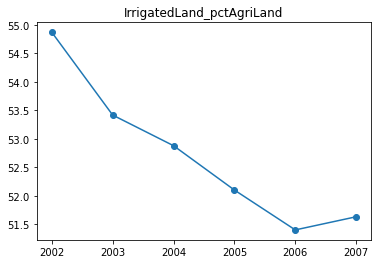

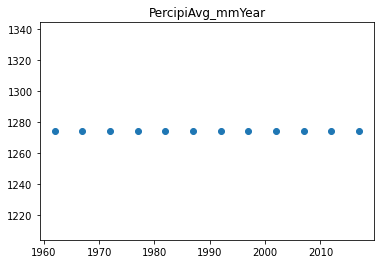

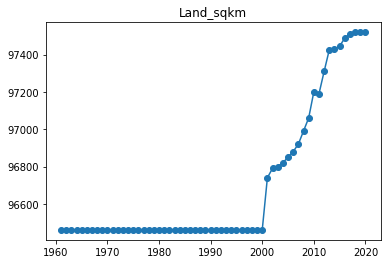

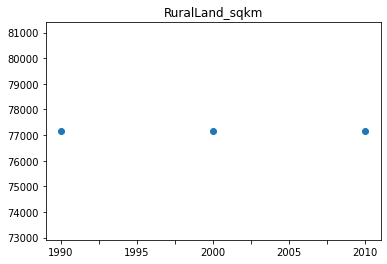

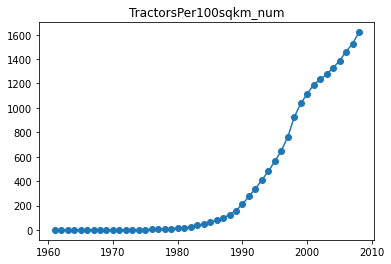

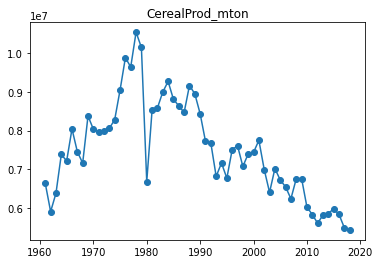

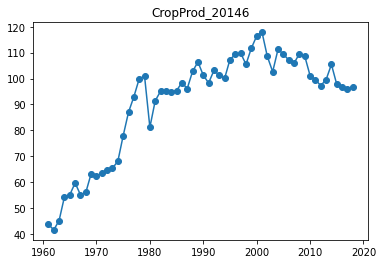

In [56]:
columns = list(tkorea_data.columns)
for col in columns[:21]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col,marker = 'o')

<ipython-input-11-7555e5517c4c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


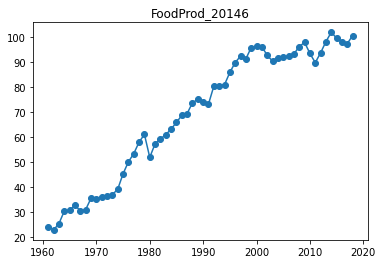

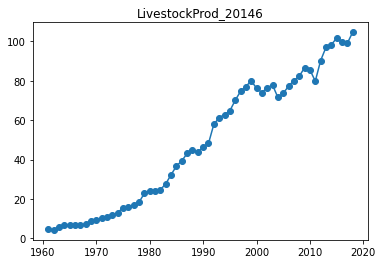

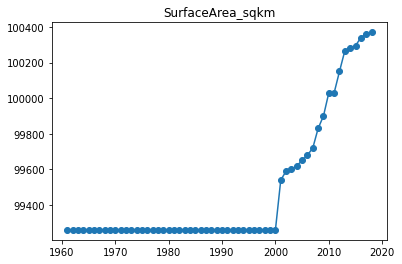

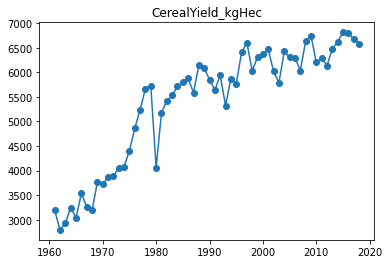

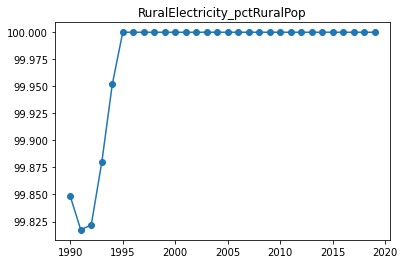

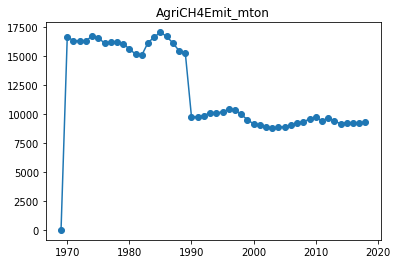

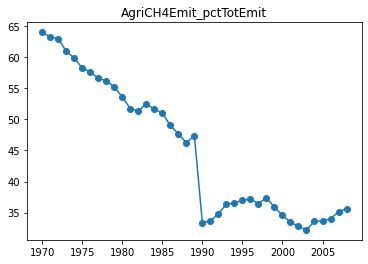

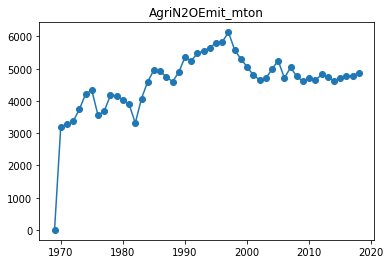

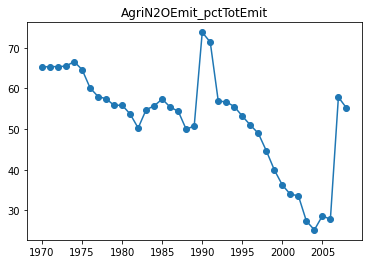

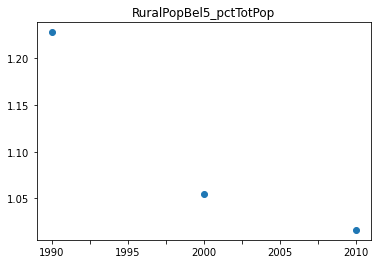

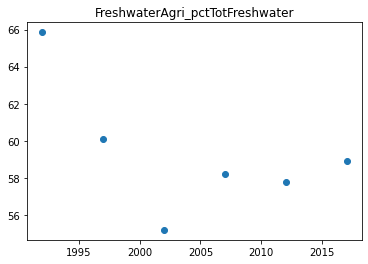

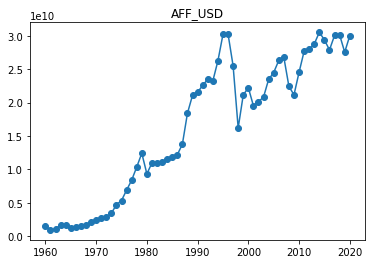

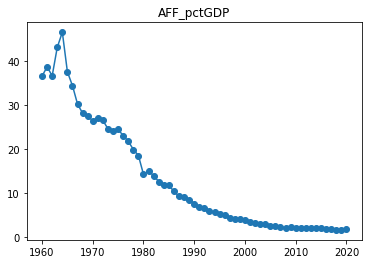

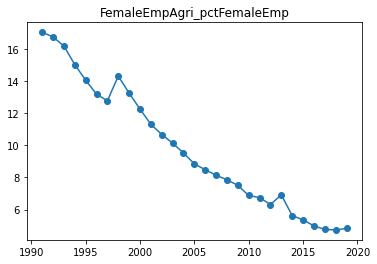

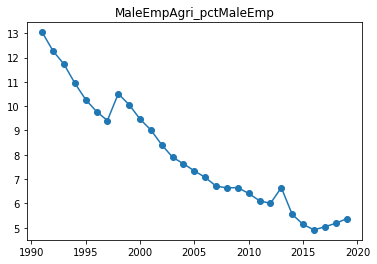

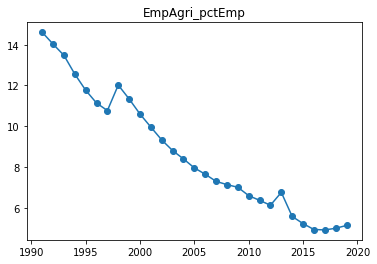

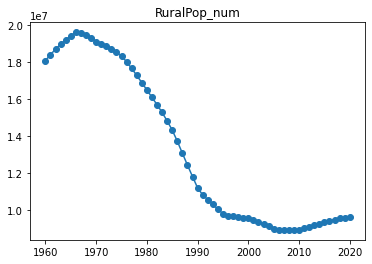

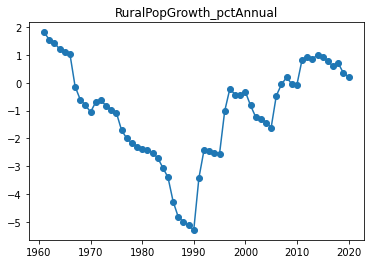

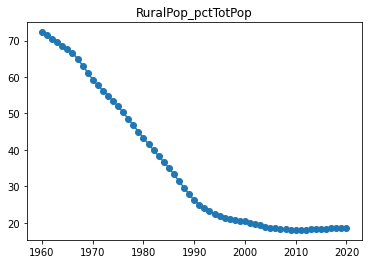

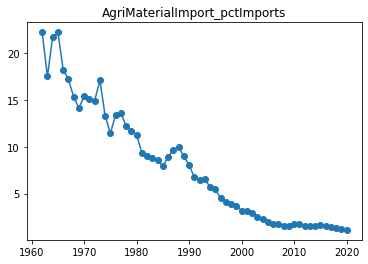

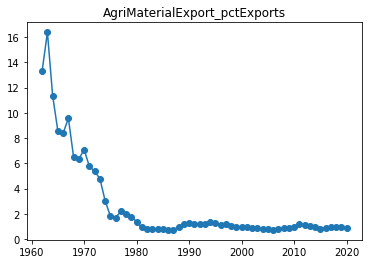

In [11]:
for col in columns[21:]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col,marker = 'o')

In [4]:
# ## drop useless series
# valid_code = [
# 'BX.GRT.EXTA.CD.WD', 'BX.GRT.TECH.CD.WD', 'DC.DAC.TOTL.CD', 'DT.ODA.ALLD.CD', 'DT.ODA.ALLD.KD',
#  'DT.ODA.OATL.CD', 'DT.ODA.OATL.KD', 'DT.ODA.ODAT.CD', 'DT.ODA.ODAT.GI.ZS',
#  'DT.ODA.ODAT.GN.ZS', 'DT.ODA.ODAT.KD', 'DT.ODA.ODAT.MP.ZS', 'DT.ODA.ODAT.PC.ZS',
#  'DT.ODA.ODAT.XP.ZS', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS','SH.DYN.AIDS.ZS',
#  'SH.DYN.MORT', 'SH.STA.ANVC.ZS', 'SH.STA.MMRT', 'SH.STA.STNT.ZS',
#  'SH.TBS.INCD', 'SI.DST.FRST.20', 'SI.POV.DDAY', 'SL.EMP.VULN.ZS', 'SM.POP.NETM']
# list_of_df = []
# for code in valid_code:
#     tmp_df = agr[agr['Series_Code']==code]
#     list_of_df.append(tmp_df)
# agr_df = pd.concat(list_of_df,ignore_index=True)

In [7]:
# ## rename series
# new_series_name = ['GrantsExTech_USD', 'GrantsTech_USD', 'NetBiDAC_USD', 'ODAOA_USD',
# 'ODAOA_2018USD','OA_USD','OA_2018USD','ODA_USD','ODA_GCF','ODA_GNI','ODA_2018USD', 'ODA_PctImport',
# 'PerCapita_ODA_USD', 'ODA_pctGov', 'School12_GPI','School1End_pct', 'HIV_pctPOP1549', 'MortalRate5_1000Birth',
# 'PrenatalCare_pct', 'MatenalMortalRate_100KBirth','Stunting_pctChild5',
# 'Tuberculosis_100Kpop','IncomeLow20','Poverty19_2011PPP','VulEmploy_PctEmp','Migration']
# New_name = pd.Series(new_series_name, name='New Name')
# New_Series_Info = pd.concat([origin_series, New_name], axis=1)
# New_Series_Info

,Series Code,Series Name,New Name
0,NaN,NaN,GrantsExTech_USD
1,NaN,NaN,GrantsTech_USD
2,NaN,NaN,NetBiDAC_USD
3,NaN,NaN,ODAOA_USD
4,NaN,NaN,ODAOA_2018USD
5,NaN,NaN,OA_USD
6,NaN,NaN,OA_2018USD
7,NaN,NaN,ODA_USD
8,NaN,NaN,ODA_GCF
9,NaN,NaN,ODA_GNI


In [33]:
# def countries_col(dataframe, sn1, sn2):
#     df1 = dataframe.loc[dataframe['Series_Name']==f'{sn1}']
#     df1 = df1.drop(['Series_Name', 'Series_Code','Country_Code'], axis=1)
#     df1.set_index('Country_Name', inplace=True)

#     df2 = dataframe.loc[dataframe['Series_Name']==f'{sn2}']
#     df2 = df2.drop(['Series_Name', 'Series_Code','Country_Code'], axis=1)
#     df2.set_index('Country_Name', inplace=True)

#     return df1, df2